# Example for EDA

In this notebook we will go through all the important steps of the data science life cycle using an example. You already got to know the first sections of this notebook in the last workshop in Python. This time we will go a few steps further and also look at machine learning models and evaluate their results.

As a little reminder, here is the Data Science Life Cycle again.


<center><img src="./images/DS_LC.png" alt="drawing" width="500"/>



The goal is to implement the essential steps of a supervised-learning work process using the Python library scikit-learn.
We will use the following methods: Feature Engineering, train-test-split, train different models, hyper-parameter optimisation using grid-search and cross-validation, evaluation of model goodness.

To illustrate all these steps, let us imagine the following (fictitious) scenario: 

**You have found your dream job as a Data Scientist in a very innovative and exciting company. They have received a very interesting job offer to you which you cannot decline. This company is located near Seattle and, therefore, you are now looking for a suitable property in the vicinity of Seattle.**


![](images/seattle_skyline.jpg)
(<span>Photo by <a href="https://unsplash.com/@phoebezzf?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Zhifei Zhou</a> on <a href="https://unsplash.com/s/photos/seattle-skyline?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>)

**As a person interested in data, you don't want to leave this house hunt to chance and make your decision based on data after good research. To achieve this, we try to predict home prices around Seattle so that you have a good estimate of the true value of the property for negotiation purposes.**


## Business Understanding

Seattle is located in King County, which is shown on the map. To avoid a long drive to your new job in Seattle, limit your property search to this area.



![](images/king_county_districts.jpeg)

(Photo from King County [imap](https://gismaps.kingcounty.gov/iMap/))

For this project we are using a dataset, which contains data on all property sales in King County from May 2014 to May 2015.

First, it is important to find out what information is contained in the dataset. 
Even though we will only see the real information later, the explanations of the individual variables are listed here. 


|**Column Names**   |  **Description** |
|---                |---:               |
| id                | unique identified for a house  | 
| date              | date the house was sold  |
| price             | price for each house  |
| bedrooms          | number of bedrooms  |
| bathrooms         | number of bathrooms,  where .5 stands for a room with a toilet but no shower  |
| sqft_living       | square footage of the home  |
| sqft_lot          | square footage of the lot   |
| floors            | number of floors  |
| waterfront        | Has the house on the water view? 0-No 1-Yes  |
| view              | An index from 0 to 4 indicating how good the survey of the property was  |
| condition         | An index from 1 to 5 for the condition of the flat,1 - lowest, 5 - highest  |
| grade             |  An index of 1 to 13, where 1-3 lags behind construction and design of buildings, 7 shows an average level of construction and design and 11-13 shows a high level of quality of construction and design. |
| sqft_basement     | square footage of the basement  |
| yr_built          | The year in which the house was originally built |
| yr_renovated      | The year of the last renovation of the house   |
| zipcode           | In which zipcode area is the house located  |
| lat               | latitude  |
| long              | logitude  |
| sqft_living15     | The square footage of interior housing living space for the nearest 15 neighbors  |
| sqft_lot15        | The square footage of the land lots of the nearest 15 neighbors  |

## Importing the Libraries


First we will import again all the libraries we need for our future work.


In [1]:
# Basic imports
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading of the dataset via pandas
kc_data = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [3]:
# We look at the first 5 lines of our data set.
# We want to make sure that the data has been read in correctly.
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data preparation 

After we have successfully loaded the data, we need a good overview of the quality of the data. 
In doing so, we would like to answer a few questions:
- How many house sales are in our data set?
- What format is the data in (int=number, float= decimal, object=text)?
- Are there any missing values?
- How many values are there for the individual variables?


1.  How many house sales are in our data set?


In [4]:
kc_data.shape


(21597, 21)

Each row contains the details of one house sale:

21597 house sales are included in our dataset.


2. What format is the data in (int=number, float= decimal number, object=text)?
Which formats are surprising?

In [5]:
kc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our dataset contains 8 columns with decimal numbers, 11 columns with integers (int) and 2 columns with object (text).
We expect all data on the size of the area, the number of rooms, the indices and the information on the location to be recognised as numbers.
The date is recognised as Object(Text) as well as the information about the area of the basement (sqft_basement).
This is surprising. A little further up, when we looked at the first 10 rows of our table, you can see why the values are not recognised as numbers: there is a "?" mixed in.


3. Are there any missing values?

We have missing values in the columns "waterfront", "view" and "yr_renovated". The most missing values are in "yr_renovated".
    
Further on we have to think about how to deal with these missing values.

4. How many values are there for the individual variables?

In [6]:
kc_data.nunique()


id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Interesting findings:
1. we have 21420 different house IDs: this means that up to 177 houses may have been sold twice. 
    
2. we have 3622 expressions for the price of sold houses: many houses were sold for the same price.
    
3. although the "grade" is an index from 1-13, we have only 11 different values included.
    
4. the houses in our dataset were built in 116 different years.

Next, we can display the distribution of the individual columns. Here, too, you are sure to discover a few interesting insights.

Small explanation of the scattering measures given:
- **count**: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- **mean**: Mean value of the data
- **std**: standard deviation of the data
- **min**: the smallest value in the data set
- **25%**: 25% of the data are below this value
- **50%**: 50% of the data are below this value. This value is called the median.
- **75 %**: 75 % of the data are below this value.
- **max**: the largest expression in the data set

In [7]:
kc_data.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


Interesting findings:

1. on average, the houses in this data set cost \$ 540 296. The most expensive house sold for 7 700 000 \$, the cheapest for 78 000 \$.

2. 50% of the houses have 3 or less bedrooms. The house with the most bedrooms has 33! (Is that possible?)

    
3. on average, each house has 2.1 bathrooms per bedroom.

4. 75% of houses have 2 or fewer floors.

5. only 7.5% of the houses have a view of the seafront (since Waterfront can only take the values 0 and 1, the mean can be interpreted as the percentage of houses with a view of the seafront).

6. the oldest house in our dataset is from 1900, the newest house from 2015.

Of course, we can find many more insights from the table above, but we have already discovered a few inconsistencies in any case. We should deal with these in Data Cleaning:
- Missing values: how do we want to deal with them?
- "?" in the column "sqft_basement" (change format from object to integer)
- the entry with 33 bedrooms

All other distributions of our data can be much better visualised later in the exploratory data analysis with charts.
First we take care of the inconsistencies.

**33 bedrooms**

If we look at the maximum number of bedrooms, we see a house with 33 bedrooms but only 2 bathrooms.

In [8]:
# Output of the line in which the condition "bedrooms = 33" is present.
kc_data.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Since the ratio of 33 bedrooms to 2 bathrooms in 1620 square feet sounds very unlikely, we are removing this house from the record.

In [9]:
# We will drop this row
kc_data.drop(15856, axis=0, inplace=True)

**"?" in "sqft_basement**

We have seen in the output of .info() that "sqft_basement" is present as an object and not as a number. There is a "?" in this column, although actually only numbers should be in this column. We now replace this with a NaN and calculate all missing values from "sqft_living - sqft_above".

In [10]:
# We replace "?" with Nan
kc_data['sqft_basement'] = kc_data['sqft_basement'].replace('?', np.NaN)
# And we change the dtype of the column "sqft_basement" to float
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(float)

In [11]:
# We are calculating the "sqft_basement" by substracting sqft_above of sqft_living
kc_data.eval('sqft_basement = sqft_living - sqft_above', inplace=True)

In [14]:
kc_data['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21596, dtype: float64

**Missings Values**



In [15]:
# Summation of the missing values and calculation of the missing values as a percentage
missing_values = pd.DataFrame(kc_data.isnull().sum(),columns=['count'])
missing_values['percentage'] = (missing_values['count']/kc_data.shape[0]*100).round(2)
missing_values.query('count != 0')

,count,percentage
waterfront,2376,11.00
view,63,0.29
yr_renovated,3842,17.79


If we look at the missing data, we see that out of 21 variables, 3 variables have missing values (missing values at "sqft_basement" have already been replaced):

- waterfront has 2376 missing values (11 %)
- view has 63 missing values (0.29 %)
- yr_renovated has 3842 missing values (17.79 %)


The column 'view' has only 0.29 % missing values and has 19422 times out of 21597 the value 0, so we decide to replace the missing values with 0.


In [16]:
# We display how often the different values of the variable occur.
kc_data['view'].value_counts()

view
0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: count, dtype: int64

In [17]:
# We replace Nan values in "view" with the most frequent expression (0)
kc_data['view'].fillna(0, inplace=True)

In the column "waterfront" we see a similar distribution, also here we replace the NaNs by 0.

In [18]:
# We display how often the different values of the variable occur.
kc_data.waterfront.value_counts()

waterfront
0.0    19074
1.0      146
Name: count, dtype: int64

In [19]:
# We replace Nan values in "waterfront" with the most frequent expression (0)
kc_data.waterfront.fillna(0, inplace=True)

In [20]:
# We again look at the missing data
missing_values = pd.DataFrame(kc_data.isnull().sum(),columns=['count'])
missing_values['percentage'] = missing_values['count']/kc_data.shape[0]*100
missing_values.query('count != 0')

,count,percentage
yr_renovated,3842,17.790332


Since 17.8% of the data is missing from "yr_renovated", we create a new column "last_known_change" from "yr_built" and "yr_renovated". And remove the other two.

In [24]:
# We will create an empty list in which we will store values
last_known_change = []

# For each row in our data frame, we look at what is in the column "yr_renovated".
for idx, yr_re in kc_data.yr_renovated.items():
    # if "yr_renovated" is 0 or contains no value, we store the year of construction of the house in our empty listes ab
    if str(yr_re) == 'nan' or yr_re == 0.0:
        last_known_change.append(kc_data.yr_built[idx])
    # if there is a value other than 0 in the column "yr_renovated", we transfer this value into our new list
    else:
        last_known_change.append(int(yr_re))

In [25]:
# We create a new column and take over the values of our previously created list
kc_data['last_known_change'] = last_known_change

In [26]:
# We delete the "yr_renovated" and "yr_built" columns
kc_data.drop("yr_renovated", axis=1, inplace=True)
kc_data.drop("yr_built", axis=1, inplace=True)

In [27]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,last_known_change
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,291.711660,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,1972.946333
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,442.673703,53.514040,0.138552,0.140725,685.231768,27275.018316,28.945525
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,1954.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1977.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1999.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


Now we are done with the data cleaning. With the Pandas commands, especially with `.describe()`, we have already obtained a quick overview of the distribution of the individual variables. In the explorative data analysis, however, we also want to display the distribution of the data graphically.

## Exploratory Data Analysis

First of all, let's look at the distribution of the individual variables in our data set. This works very well with histograms. Here we show the frequency distribution of the individual variables.

In [28]:
# Selection of certain variables we want a closer look at
columns_histogram = ['price', 'bathrooms', 'bedrooms', 'floors', 'grade', 'last_known_change', 'sqft_living', 'sqft_lot']

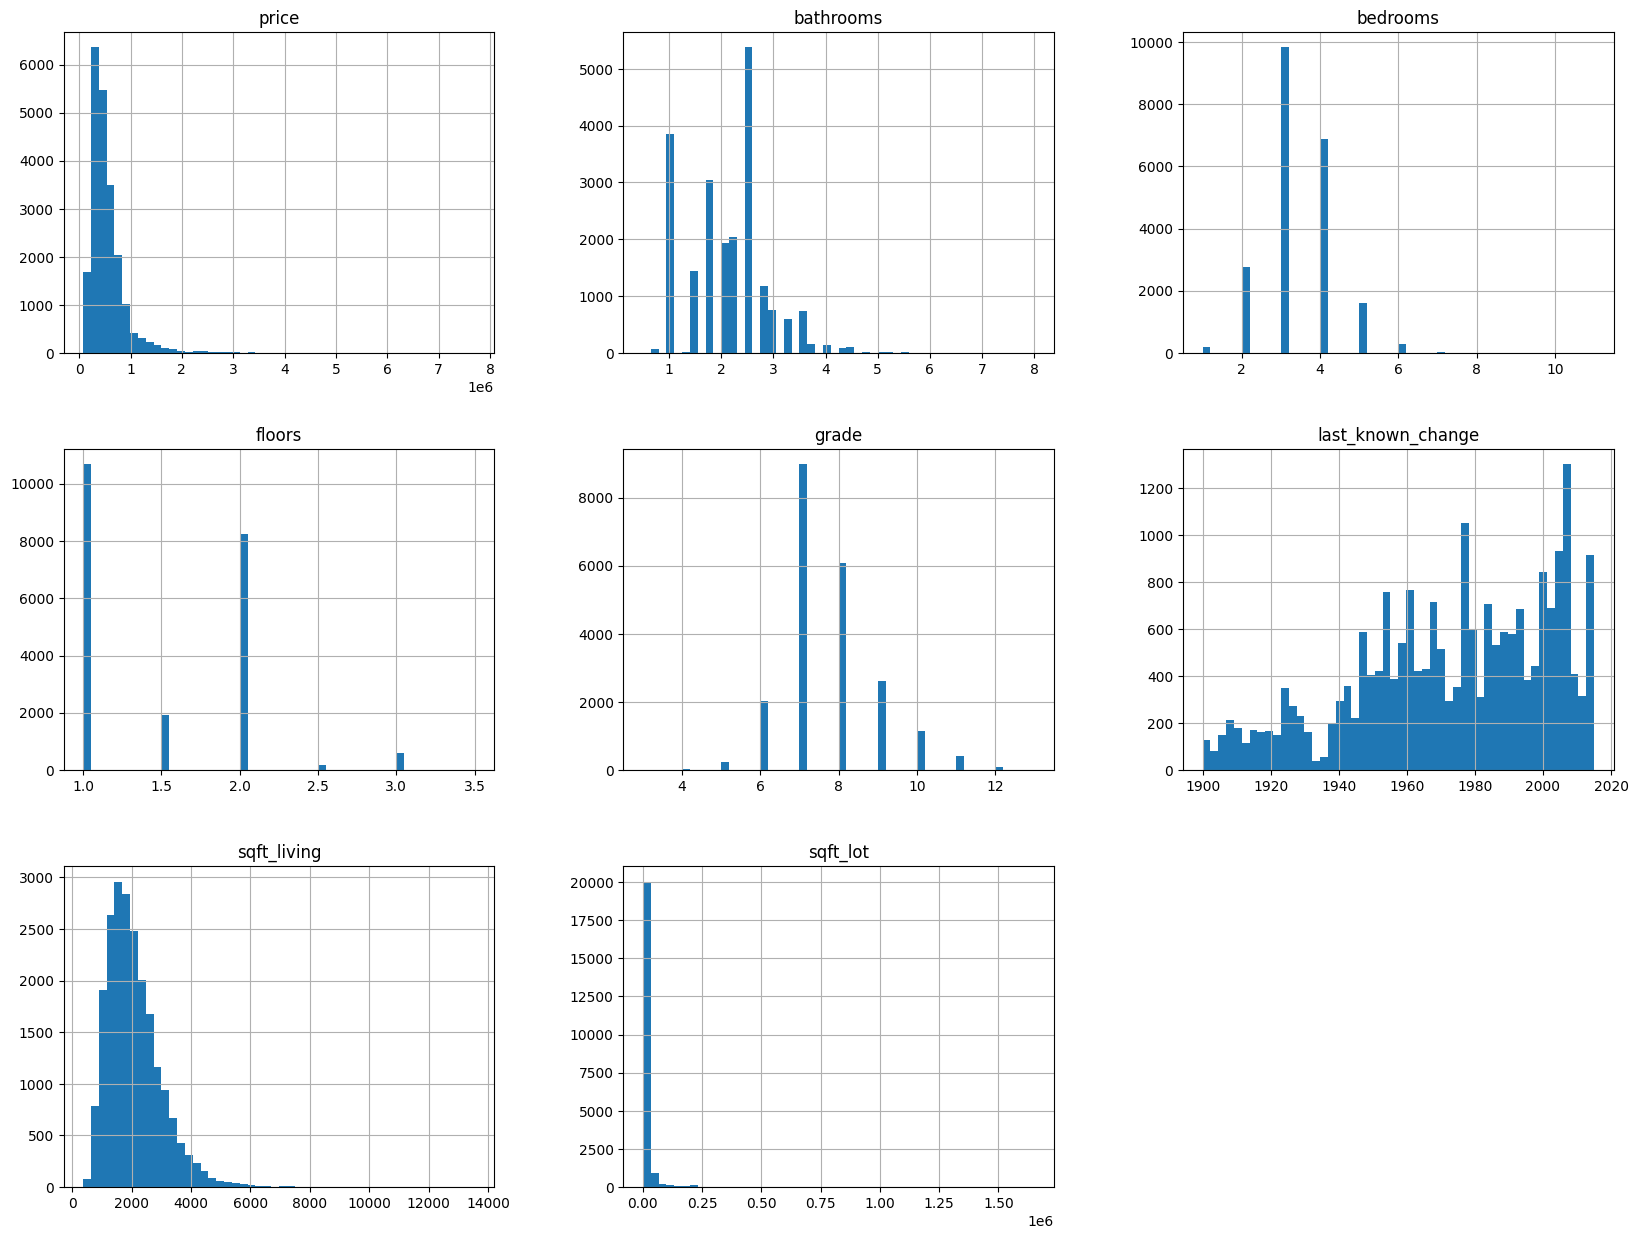

In [29]:
# Plotting of Histograms
kc_data[columns_histogram].hist(bins=50, figsize = (20,15))
plt.show()

With the help of the histograms, you can quickly see how the data is distributed, but also whether it is categorical.
Findings:
- Over 5000 houses have 2.5 bathrooms (0.5 bathroom in America is a room with only a toilet). This makes 2.5 bathrooms the most common value in our dataset.
- most houses in our dataset have between 2 and 5 bedrooms, with 3 bedrooms being the most common.
- most of the houses in our dataset have only one floor.
- most of the houses in our dataset have a rating between 6 and 10 (scale 1-13).
- the oldest house in our dataset dates from 1900. very few houses were built or renovated between 1930 and 1940. After that, more houses were built or renovated.
- In terms of price, we see a right-skewed distribution. In addition, there are very extreme values here, which is why the position of the most frequent values is very much to the left.
- We also see a slight right-skewed distribution for living space.
- The extreme values for the land areas distort the histogram extremely. In order to be able to recognise a true distribution of the values, extreme values can be removed here.

Another form of representation of the distribution of the variables is a box plot. Here the individual distribution measures, which we have already got to know with `kc_data.describe()`, are displayed graphically. 

In [30]:
# Plotting of the Box-Plots
fig = px.box(kc_data, y="price", labels={"price": "House Price in $"})
fig.show()

We see some outliers in our data set here. Outliers can strongly influence the quality of models. Therefore, it is important to think about why outliers occur. 
In the case of our house with 33 bedrooms, we were suspicious of this information, possibly someone made a typing error there and the house only has 3 bedrooms. Since it was only an isolated case, we deleted this line completely. 
However, many houses with very high prices appear here. Of course, these very expensive houses are a rarity, but they can be explained quite logically: there are a lot of very rich people living in Seattle who can afford such a property. For this reason, we will not remove these outliers.


Furthermore, it is very interesting to look at the correlation between the individual variables. This "pair plot" is suitable for a quick overview. Here, the individual variables (e.g. first row: price) are shown in a scatter plot over the other variables. On the diagonal (top left corner: price over price) the histogram of the individual variables is shown.

Interesting findings here could be correlations between two variables. That means: how do two variables influence each other? For example, how does the price change when the living space increases?

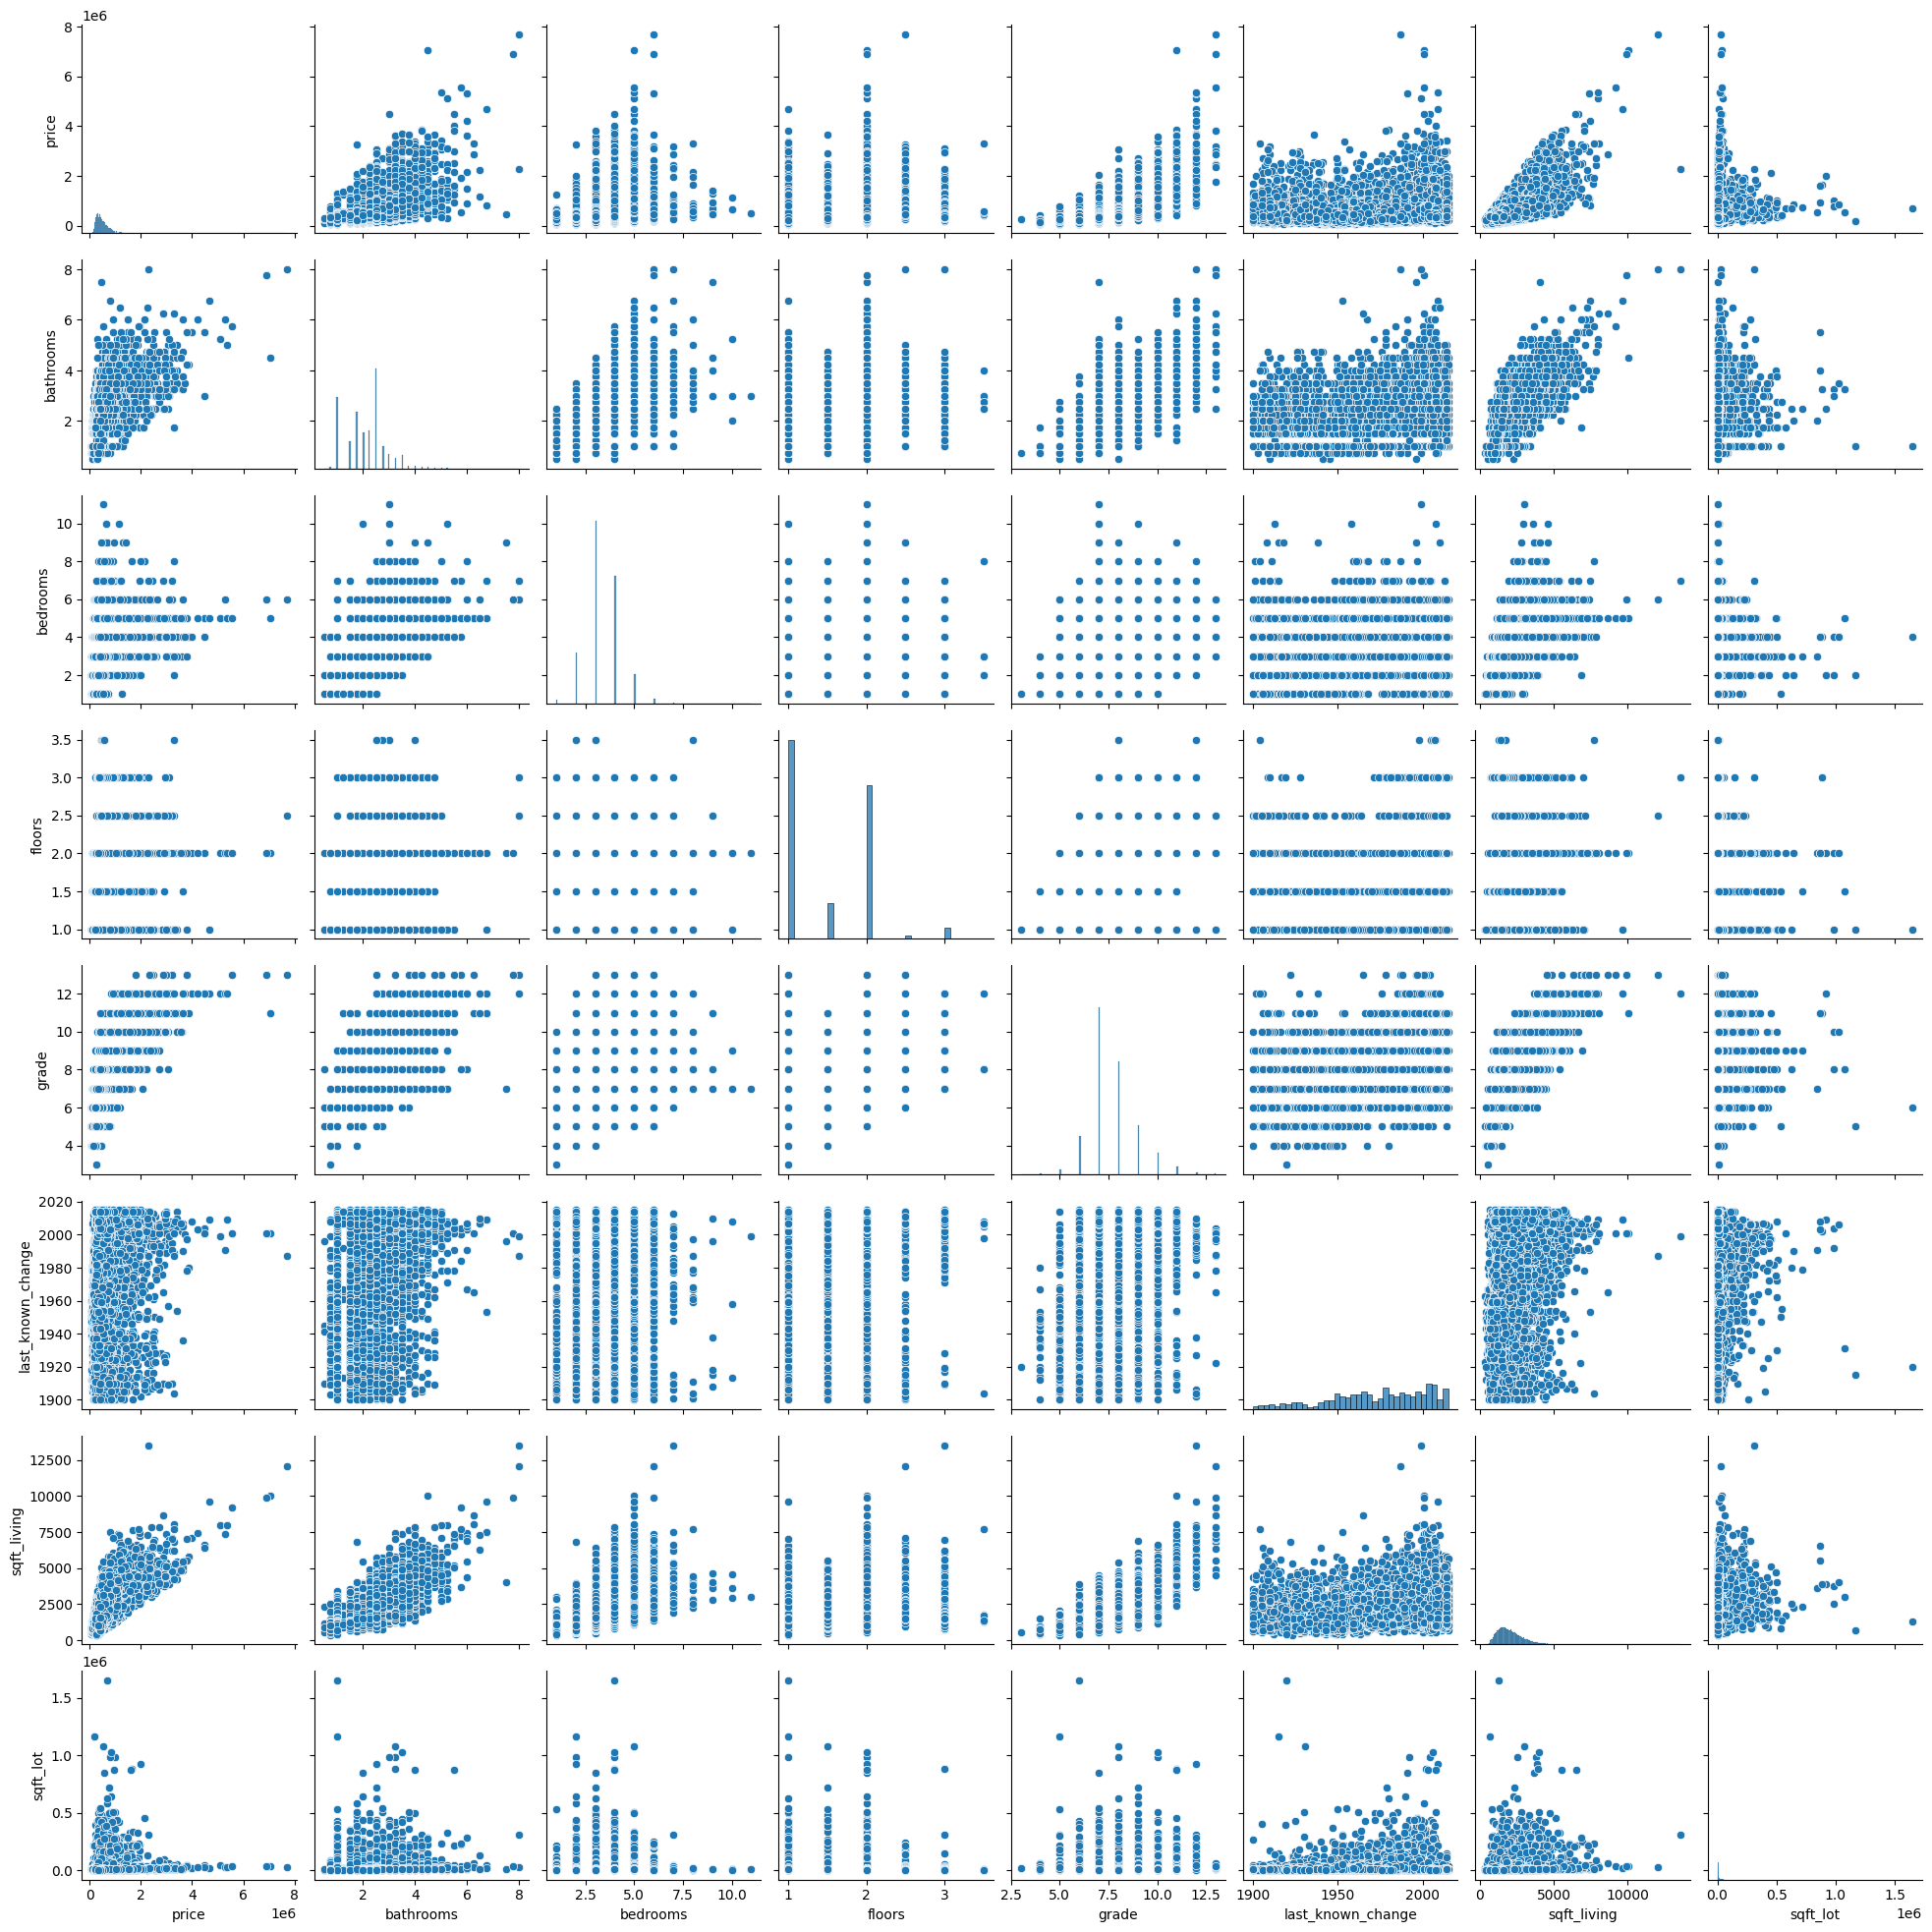

In [31]:
# Plotting of Scatterplots
sns.pairplot(kc_data[columns_histogram]);

A different representation of the correlation (linear relationship) is achieved through a heat map. Here, the correlation of each variable with every other variable is determined. It shows how strong the linear correlation is. Extremely strong colours indicate a strong correlation. Red indicates a positive correlation (e.g. with increasing living space the price increases), blue indicates a negative correlation (e.g. with increasing price the distance to the centre decreases).

It is very interesting to see how much the individual variables influence the price. From this, one can deduce which variables are well suited to predict our target variable in a linear model.

In [40]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21596 non-null  int64  
 1   date               21596 non-null  object 
 2   price              21596 non-null  float64
 3   bedrooms           21596 non-null  int64  
 4   bathrooms          21596 non-null  float64
 5   sqft_living        21596 non-null  int64  
 6   sqft_lot           21596 non-null  int64  
 7   floors             21596 non-null  float64
 8   waterfront         21596 non-null  float64
 9   view               21596 non-null  float64
 10  condition          21596 non-null  int64  
 11  grade              21596 non-null  int64  
 12  sqft_above         21596 non-null  int64  
 13  sqft_basement      21596 non-null  float64
 14  zipcode            21596 non-null  int64  
 15  lat                21596 non-null  float64
 16  long               21596 no

In [37]:
# Heatmap of the Pearson correlation coefficients
mask = np.triu(kc_data.drop("date",axis=1).corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(kc_data.corr(), 2)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

ValueError: could not convert string to float: '10/13/2014'

<Figure size 2000x1500 with 0 Axes>

## Feature Engineering

In feature engineering, we try to generate additional features (variables) that have a better explanatory power or a higher predictive power with respect to our target variable.

In our case, we first want to adjust our target variable. Often people pay more attention to the price/performance ratio than to the price alone when making a purchase. In our example, we can achieve this by looking at the price per square foot of living space rather than the total price of the property.

In [41]:
# We create a new variable that gives us the price per square foot of living space
kc_data['sqft_price'] = (kc_data.price/(kc_data.sqft_living + kc_data.sqft_lot)).round(2)

**Distance to the centre of wealth**.

One of the richest people in the world, Bill Gates; has a residence in Medina right on Lake Washington. According to Wikipedia, the estate has a total estimated value of US$ 147.5 million.

<p><a href="https://commons.wikimedia.org/wiki/File:Residence_of_Bill_Gates.jpg#/media/File:Residence_of_Bill_Gates.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Residence_of_Bill_Gates.jpg/1200px-Residence_of_Bill_Gates.jpg" alt="Bill Gates' mansion annat"></p>

Also interesting for the price of a house in King County might be how far it is from the centre of wealth. To do this, we first calculate the absolute difference in latitude and longitude of each house to Bill Gates' residence and then calculate the physical distance between each house and the "centre" above in kilometres (this requires renormalising longitude by a factor cos(lat) to correct for the fact that the spatial distance of one degree of longitude depends on latitude (6378 is the radius of the earth in kilometres).

In [42]:
kc_data[kc_data['sqft_price']==kc_data['sqft_price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,last_known_change,sqft_price
3449,2559950110,4/22/2015,1230000.0,2,2.5,2470,609,3.0,0.0,0.0,...,11,1910,560.0,98112,47.6182,-122.312,2440,1229,2011,399.48


In [43]:
kc_data[kc_data['price']==kc_data['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,last_known_change,sqft_price
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,98102,47.6298,-122.323,3940,8800,1987,194.2


In [44]:
# Absolute difference of latitude between centre and property
kc_data['delta_lat'] = np.absolute(47.62774- kc_data['lat'])
# Absolute difference of longitude between centre and property
kc_data['delta_long'] = np.absolute(-122.24194-kc_data['long'])
# Distance between centre and property
kc_data['center_distance']= ((kc_data['delta_long']* np.cos(np.radians(47.6219)))**2 
                                   + kc_data['delta_lat']**2)**(1/2)*2*np.pi*6378/360

Now let's take a look at whether our assumption is correct and whether properties close to the city centre are more expensive.

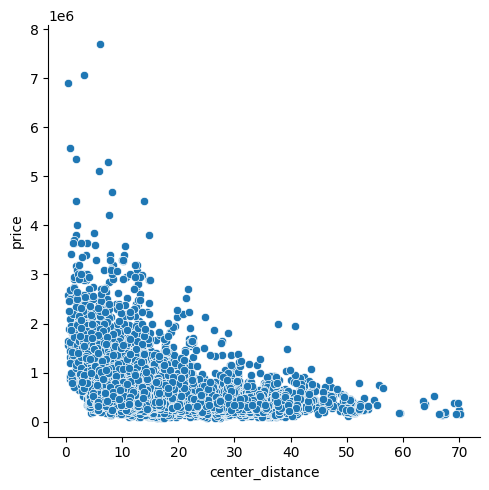

In [45]:
# Scatter plot: Price over distance to centre
sns.relplot(y="price", x="center_distance", data=kc_data);

In [ ]:
# Scatter plot: price per square foot of living space versus distance to the centre
sns.relplot(y="sqft_price", x="center_distance", data=kc_data);

The diagrams illustrate our hypothesis: the price decreases with increasing distance from the centre. The price/performance ratio improves with increasing distance from the centre: the price per square foot decreases.

We can view all the existing houses in our dataset once on the map of King County. The colour indicates how close the house is to the centre of wealth.
The size of the dots corresponds to the height of the price.

In [ ]:

fig = px.scatter_mapbox(kc_data,
                        lat="lat",
                        lon="long",
                        hover_name="id",
                        hover_data=["sqft_price", "sqft_living", "zipcode", 'floors'],
                        size='sqft_price',
                        color='center_distance',
                        color_continuous_scale=['green', 'yellow', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=7.7,
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


**Distance to the beach promenade**

In the following we try to construct a measure of water proximity. For this purpose we extract the list of houses with waterfront = 1 and call it water_list. Then we calculate for each house the minimum distance to a member of the water_list. We call this minimum distance water_distance. This is not entirely accurate, since the houses in water_list do not make up all the houses near the coast, but we have no better data.


In [46]:
# This function helps us to calculate the distance between the house overlooking the seafront and the other houses.
def dist(long, lat, ref_long, ref_lat):
    '''dist computes the distance in km to a reference location. Input: long and lat of 
    the location of interest and ref_long and ref_lat as the long and lat of the reference location'''
    delta_long = long - ref_long
    delta_lat = lat - ref_lat
    delta_long_corr = delta_long * np.cos(np.radians(ref_lat))
    return ((delta_long_corr)**2 +(delta_lat)**2)**(1/2)*2*np.pi*6378/360

In [47]:
# All houses with "waterfront" are added to the list
water_list= kc_data.query('waterfront == 1')
water_list.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,last_known_change,sqft_price,delta_lat,delta_long,center_distance
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,98070,47.4041,-122.451,2680,72513,1953,19.92,0.22364,0.20906,29.424514
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,98166,47.4497,-122.375,2030,13193,1978,37.98,0.17804,0.13306,22.191410
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,98074,47.6338,-122.072,3120,18841,2000,199.93,0.00606,0.16994,12.768424
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,98070,47.4683,-122.438,1230,14267,1936,34.13,0.15944,0.19606,23.052131
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,98074,47.6053,-122.077,4550,19508,2002,132.81,0.02244,0.16494,12.625028


In [49]:
water_distance = []
# For each row in our data frame we now calculate the distance to the seafront
for idx, lat in kc_data.lat.items():
    ref_list = []
    for x,y in zip(list(water_list.long), list(water_list.lat)):
        ref_list.append(dist(kc_data.long[idx], kc_data.lat[idx],x,y).min())
    water_distance.append(min(ref_list))

In [50]:
# wir erstellen eine neue Spalte und übernehmen die Werte unserer vorher erstellten Liste
kc_data['water_distance'] = water_distance

In [51]:
# we create a new column and take over the values of our previously created list
kc_data.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,last_known_change,sqft_price,delta_lat,delta_long,center_distance,water_distance
count,2.159600e+04,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,...,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00
mean,4.580575e+09,540291.96,3.37,2.12,2080.34,15099.83,1.49,0.01,0.23,3.41,...,47.56,-122.21,1986.65,12758.66,1972.95,59.73,0.12,0.11,17.53,5.54
std,2.876764e+09,367376.02,0.90,0.77,918.12,41413.55,0.54,0.08,0.76,0.65,...,0.14,0.14,685.23,27275.02,28.95,45.62,0.10,0.09,10.15,5.93
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,47.16,-122.52,399.00,651.00,1900.00,0.16,0.00,0.00,0.34,0.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,...,47.47,-122.33,1490.00,5100.00,1954.00,28.14,0.05,0.06,10.33,1.91
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7619.00,1.50,0.00,0.00,3.00,...,47.57,-122.23,1840.00,7620.00,1977.00,46.88,0.09,0.10,14.46,3.42
75%,7.308950e+09,645000.00,4.00,2.50,2550.00,10685.50,2.00,0.00,0.00,4.00,...,47.68,-122.12,2360.00,10083.00,1999.00,78.02,0.16,0.15,22.54,6.36
max,9.900000e+09,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,47.78,-121.32,6210.00,871200.00,2015.00,399.48,0.47,0.93,70.19,57.43


The new variables have been added to our table at the very end. On average, the houses in our dataset are 17 km from the centre and almost 19 km from a house with a water view. The house with the greatest distance to the centre is about 70 km away.

Again, we would like to test our hypothesis whether the proximity to the water has an influence on the price.

In [ ]:
sns.relplot(y="price", x="water_distance", data=kc_data);

In [ ]:
sns.relplot(y="sqft_price", x="water_distance", data=kc_data);

The diagrams illustrate our hypothesis: the price decreases with increasing distance to the water. The price/performance ratio improves with increasing distance to the water: the price per square foot decreases.

On the map we can look again at whether we have calculated our variable correctly. We see that houses close to the water have low water_distances (green).

In [ ]:
fig = px.scatter_mapbox(kc_data.query('water_distance <= 5'),
                        lat="lat",
                        lon="long",
                        hover_name="id",
                        hover_data=["sqft_price", "sqft_living", "zipcode", 'floors'],
                        size='sqft_price',
                        color='water_distance',
                        color_continuous_scale=['green', 'yellow', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=8.4,
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

# Modeling


Now that we have looked at the data in more depth, we can start to forecast possible new houses.

Our goal is to determine the price for which new houses will sell.

In this scenario, we realise that we do not yet know the true sales price until the house has been successfully sold. We can only test our model if we have such new and unknown data. However, we do not have this data at the moment.

Therefore, we only work with part of the data to train our model and keep another part as test data. We consider this test set as new house sales that we want to estimate with our model. We can then compare the results of the model with the true sales prices and determine how well our model determines the true sales prices.
To separate the dataset into training and testing data, we use a feature of Scikit-Learn: Train-Test-Split. Here we specify what our independent variables are (X) and what our predicted dependent variable is (y). We also specify what percentage of the data the test set should be. Another important parameter we submit is called " random state". With this parameter, our data is first shuffled before it is split into the train and the test set. This is important because the order of the data should not affect the prices of the houses (imagine if we sorted the data by price and then cut the bottom 30% for our test set, this would mean that our model would never have seen houses in that price category and would therefore be very difficult to apply to the new data). By assigning a number to the random state, we ensure that our data is mixed but always identically separated so that the results are reproducible.

Before we make this important split, we remove the columns in our table that have no predictive value. It is also important to store our dependent variable (y) separately and remove any variables that could cause data leakage.

In [52]:
kc_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,last_known_change,sqft_price,delta_lat,delta_long,center_distance,water_distance
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,1955,32.49,0.11654,0.01506,13.022012,0.678977
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,1991,54.83,0.09326,0.07706,11.882906,2.910551
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,1933,16.71,0.11016,0.00894,12.281023,2.327626
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,1965,86.78,0.10694,0.15106,16.436889,0.467532
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,1987,52.25,0.01094,0.19694,14.826499,1.726771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,47.6993,-122.346,1530,1509,2009,135.29,0.07156,0.10406,11.154088,5.346761
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,47.5107,-122.362,1830,7200,2014,49.24,0.11704,0.12006,15.839476,1.724718
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,47.5944,-122.299,1020,2007,2009,169.66,0.03334,0.05706,5.665915,0.925361
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,47.5345,-122.069,1410,1287,2004,100.30,0.09324,0.17294,16.616144,2.402901


In [53]:
# We have to remove these columns because of Data Leakage: price or because they do not provide prognostic information.
drop_lst = ['sqft_price', 'date', 'delta_lat', 'delta_long',]

In [54]:
# we would like to consider all variables except the ones mentioned above
all_features = [x for x in kc_data.columns if x not in drop_lst]

In [55]:
# X contains all descriptive variables defined above
X = kc_data[all_features]

In [56]:
X

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,last_known_change,center_distance,water_distance
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,98178,47.5112,-122.257,1340,5650,1955,13.022012,0.678977
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,98125,47.7210,-122.319,1690,7639,1991,11.882906,2.910551
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,98028,47.7379,-122.233,2720,8062,1933,12.281023,2.327626
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,98136,47.5208,-122.393,1360,5000,1965,16.436889,0.467532
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,98074,47.6168,-122.045,1800,7503,1987,14.826499,1.726771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0.0,98103,47.6993,-122.346,1530,1509,2009,11.154088,5.346761
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0.0,98146,47.5107,-122.362,1830,7200,2014,15.839476,1.724718
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0.0,98144,47.5944,-122.299,1020,2007,2009,5.665915,0.925361
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,1600,0.0,98027,47.5345,-122.069,1410,1287,2004,16.616144,2.402901


In [ ]:
# we define y (our dependent variable): we take the price
y = kc_data.price

In [ ]:
# We separate our data into train and test data. In the process, 30 % of the data is used for the subsequent testing of the prognostic quality.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# we can look at how much data is in each dataset
print("X_train (features for the model to learn from): ", X_train.shape)
print("y_train (labels for the model to learn from): ", y_train.shape)
print("X_test (features to test the model's accuracy against): ", X_test.shape)
print("y_test (labels to test the model's accuracy with): ", y_test.shape)

In [ ]:
# If we look at the first 5 lines of our training data, we see that the index is no longer sorted, it has been shuffled.
X_train.head()

After these preparations, we now come to modelling. 
For this we will continue to use the scikit-learn library, in which many different algorithms are implemented.
The procedure is always the same:

- we import the algorithm from scikit-learn which we want to use.

- we determine the model, often there are additional hyperparameters we have to specify
- we determine which variables to pass to the model
- we train the model (we call the method `.fit(X_train, y_train)` on our model)
- we test the model with our test data and get the adjusted R^2 as metric (we call the method `.score(X_test, y_test)` on our trained model and clean up the score).


In [ ]:
# We determine the model, there must be 2 round brackets behind the model name!
model_lin_reg = LinearRegression()

Next, we determine which variables we pass to our model to determine the price of the houses.
The simplest model calculates the price using only one variable: for example, the "grade" of the house.

In [ ]:
# We determine which variables we pass to the model
variables = ['grade',]

In [ ]:
# Training of the model
model_lin_reg.fit(X_train[variables], y_train)

In [ ]:
# We look at how well our model performs on the test data
print('adj. R^2:', (1-(1-model_lin_reg.score(X_test[variables], y_test))*(X_test.shape[0]- 1)/(X_test.shape[0]-len(variables)-1)).round(2))

The adjusted R^2 indicates the percentage of variance of the target variable (price per square foot) explained by the model. Adjusted R² is a modified version of R² that has been adjusted with the number of explanatory variables. It penalises the addition of unnecessary variables and allows comparison of regression models with different numbers of explanatory variables.
The value 1 means 100 % of the variance of the target variable could be explained by the model. The value 0 means 0 % of the variance of the target variable could be explained by the model. 
This means for our case: The variable "grade" can explain 43 % of the variance in the price per square foot of the houses in our test set.
Perhaps more variables could explain more variance. 
We can look again at what variables we have:

In [ ]:
# Names of the variables in the data set
X_train.columns

We can use all these variables to predict the price per square foot.
Maybe the age of the house could also play a big influence.
Therefore, we will now try a new linear regression with these 2 variables.

In [ ]:
# We determine the model, there must be 2 round brackets behind the model name!
model_lin_reg = LinearRegression()

In [ ]:
# We determine which variables we pass to the model
variables = ['grade','last_known_change']

In [ ]:
# we train the model
model_lin_reg.fit(X_train[variables], y_train)

In [ ]:
# We look at how well our model performs on the test data
print('adj. R^2:', (1-(1-model_lin_reg.score(X_test[variables], y_test))*(X_test.shape[0]- 1)/(X_test.shape[0]-len(variables)-1)).round(2))

We see that with this additional variable, 48% of the variance in the price per square foot could be explained.

So far we have only looked at the linear relationships between the variables and the price. However, it is possible that the relationship is not linear, but rather quadratic. 
We can easily extend our model by squaring our variables. Thus, instead of:

$price = b*(grade) + c$

we can also use 

$price=a*(grade)^{2}+b*(grade)+c$

can be obtained.
This is a type of feature engineering. We will apply it to our complete data set and see if we can improve our model even further.

In [ ]:
# We want to create only polynomial variables of second order (^2)
poly = PolynomialFeatures(2)

In [ ]:
# create a copy of the Train and Test data
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

# drop the id column
X_train_poly = X_train_poly.drop(columns=['id'])
X_test_poly = X_test_poly.drop(columns=['id'])

In [ ]:
# We create new variables by calling poly
X_train_sq = poly.fit_transform(X_train_poly)

# We have to do the same for our test data, of course
X_test_sq = poly.transform(X_test_poly)

In [ ]:
# We determine the model, there must be 2 round brackets behind the model name!
model_lin_reg = LinearRegression()

In [ ]:
# We also train the model with squared variables
model_lin_reg.fit(X_train_sq, y_train)

In [ ]:
# We look at how well our model performs on the test data
print('adjusted R^2:', (1-(1-model_lin_reg.score(X_test_sq, y_test))*(X_test_sq.shape[0]- 1)/(X_test_sq.shape[0]-X_test_sq.shape[1]-1)).round(2))

With the additional squared variables, we were able to improve our result a bit more.


With the adjusted R^2 value we have a possibility to evaluate the quality of our model, but it may be worthwhile to have a look at the real errors of the model graphically. This may help to identify systematic errors.
For ease of interpretation, we choose the percentage price difference between our forecast and the true values.

We see a few outliers here. We can take a closer look at the highest one. 

In [ ]:
# Error analysis
# In order to better analyse the errors of our model, we create a new dataframe with the
# columns "price" (the real price), as well as the latitudes and longitudes
y_predictions = model_lin_reg.predict(X_test_sq)
df_error = pd.DataFrame(y_test)
df_error['latitude'] = X_test['lat']
df_error['longitude'] = X_test['long']
df_error['id'] = X_test['id']
df_error.head(2)

In [ ]:
# To add the predicted price as a column as well, we must first reset the index
df_error.reset_index(inplace=True, drop=True)
df_error.head(2)

In [ ]:
# Now we can also add the predicted price as a column and calculate the difference
df_error['price_prediction'] = y_predictions.round(2)
df_error['price_difference'] = (df_error['price_prediction'] - df_error['price']).round(2)
df_error['price_difference_procent'] = ((df_error['price_difference']/df_error['price'])*100).round(2)
df_error.head(2)

In [ ]:
fig = px.scatter_mapbox(df_error,
                        lat="latitude",
                        lon="longitude",
                        hover_data=["price", "price_prediction", 'id'],
                        color='price_difference_procent',
                        color_continuous_scale=['green', 'yellow', 'red'],
                        zoom=7.7,
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [ ]:
df_error[df_error['price_difference_procent']==df_error['price_difference_procent'].max()]

In [ ]:
X_test[X_test['id']==9272202260]

We want to take a closer look at these houses. King County also provides very good information on this. On [this page](https://localscape.property/#kingcountyassessor/My-Property) you can search for houses by their ID and get both the neighbourhood on a map and a picture of the house.
In the field at the top left, change the selection "Address" to "Parcel ID" and add the "id" of our outlier.

Under "Basic Property Characteristics" and on the map under "KC Aerial Images" we see that there is no longer a house on this property. Therefore, our data is misleading and our model estimates a much higher price.


## Regularisation and hyperparameter tuning of linear regression

In addition to our variables, we have also passed the squared variables to our last linear model. So we have passed a lot of variables to our model. Some may have no effect on the price at all. However, models try to extract some information from all variables. This leads to random variance in the data also being recognised as a pattern. This phenomenon is called "overfitting" the model to the data.
For each algorithm there are ways to prevent this overfitting.

In the case of linear regression, we force the model not to use variables for forecasting. We "regularise" the model. But instead of us telling the model which variables not to use, we let the model learn which variables offer the least added value and remove those variables (in the case of linear regression, variables are no longer considered if the learned coefficient (b) is zero). How much we regularise is up to us.
[Here](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) you can find information on the ElasticNet model used.
To find out how much we should regularize our model, we can test different values for the regularzation parameters and see which will give us the best model. For this purpose we can use [GridSearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) with [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).



In [ ]:
# We specify which hyperparameters we want to change:
# alpha: specifies how much we regularise:
param_grid = {'alpha':[0.1,.5,1,5,10,],
             'l1_ratio': [1,0.5,0]}

# We determine the model, there must be 2 round brackets behind the model name!
elastic = ElasticNet(max_iter=50000, tol=0.2)

# Passing the model to a so-called parameter grid with 5-fold cross-validation
elastic_cv= GridSearchCV(elastic,param_grid,cv=5, verbose=True,n_jobs=-1)

# We train the model and optimise it via GridSearch
elastic_cv.fit(X_train_sq,y_train)

In [ ]:
# Output of the best parameters found by the GridSearch.
elastic_cv.best_params_

In [ ]:
# We train the model with the optimal hyperparameters
elastic = ElasticNet(max_iter=50000, tol=0.2,**elastic_cv.best_params_)

elastic.fit(X_train_sq, y_train)

In [ ]:
# We look at how well our model performs on the test data
adj_r2 = (1-(1-elastic.score(X_test_sq, y_test))*(X_test_sq.shape[0]- 1)/(X_test_sq.shape[0]-(X_test_sq.shape[1]-sum(elastic.coef_== 0))-1)).round(2)
print('adjusted R^2:',adj_r2 )

We were able to further improve our model through hyperparameter tuning and regularisation. 
As mentioned above, regularisation eliminates variables from the forecast. This is done by giving the coefficients of the linear regression a value of zero. With the following code we can look at the learned coefficients (here only a section of the first 5 coefficients) and see that for the first variable a coefficient of zero was calculated. This variable was therefore removed by our regularisation.

In [ ]:
# Output of the first 5 learned coefficients of linear regression
elastic.coef_[0:5]

In [ ]:
# Error analysis
# In order to better analyse the errors of our model, we create a new dataframe with the
# columns "price" (the real price), as well as the latitudes and longitudes
y_predictions = elastic.predict(X_test_sq)
df_error = pd.DataFrame(y_test)
df_error['latitude'] = X_test['lat']
df_error['longitude'] = X_test['long']
df_error['id'] = X_test['id']
df_error.head(2)

In [ ]:
# To add the predicted price as a column as well, we must first reset the index
df_error.reset_index(inplace=True, drop=True)
df_error.head(2)

In [ ]:
# Now we can also add the predicted price as a column and calculate the difference 
df_error['price_prediction'] = y_predictions.round(2)
df_error['price_difference'] = (df_error['price_prediction'] - df_error['price']).round(2)
df_error['price_difference_procent'] = ((df_error['price_difference']/df_error['price'])*100).round(2)
df_error.head(2)

In [ ]:
fig = px.scatter_mapbox(df_error,
                        lat="latitude",
                        lon="longitude",
                        hover_data=["price", "price_prediction", 'id'],
                        color='price_difference_procent',
                        color_continuous_scale=['green', 'yellow', 'red'],
                        zoom=7.7,
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [ ]:
df_error[df_error['price_difference_procent']==df_error['price_difference_procent'].max()]

In [ ]:
X_test[X_test['id']==5111400086]

Let's take a closer look at this house. King County also provides very good information about it. On [this page](https://localscape.property/#kingcountyassessor/My-Property) you can search for houses by their ID and get both the neighbourhood on a map and a picture of the house.
In the box at the top left, they change the "Address" selection to "Parcel ID" and add the "id" of our outlier there.

This house sold in 2018 for a price of  295,000 USD. But King County appraisers also assessed a higher price in 2014: under "Historical Value" they see that in 2014 the "Total Assessed Value" was 212,000 USD. So this house sold for about half the appraised price!



## Save the model

We have now trained a model that can predict the price of a house in King County. We can now save this model using [skops](https://skops.readthedocs.io/en/stable/modules/classes.html#module-skops.io).

In [ ]:
import skops.io as sio

with open('model/model.bin', 'wb') as f_out:
    sio.dump(elastic, f_out)

### Conclusion
Despite the outliers, we succeeded in creating a model that predicts prices with an accuracy of 76%. We found that the creation of new variables, but also the squaring of these variables and the regularisation of the model play an important role in the quality of the prediction. 